In [382]:
import numpy as np
import pandas as pd
import uproot as up 
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.path import Path
from matplotlib.collections import LineCollection
import imageio.v2 as imageio  # v2 pour éviter des warnings
from natsort import natsorted
print(os.getcwd())
%load_ext autoreload
%autoreload 2

import my_functions as fct

from IPython.core.interactiveshell import InteractiveShell #Pour controler l'affichage des outputs des cellules

show_all_output = False

if show_all_output :
    InteractiveShell.ast_node_interactivity = "all"
else :
    InteractiveShell.ast_node_interactivity = "last_expr"

/Users/antoinevezon/Desktop/M2_PFA/Stage_M2/Ordi_lab/RHB2
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Déclaration des variables utiles

In [383]:
Adc_to_mV = 0.29175
Qt2t_to_pC = 0.16699

on_lab_desktop = False
on_my_laptop = not on_lab_desktop

plot = True
save = False
GIF_gen = False

if GIF_gen:
    plot = False

if save == True :
    if on_lab_desktop == True:
        save_dir_path = "/home/vezon/Bureau/RHB2/fig_New_plast"
    if on_my_laptop == True:
        #save_dir_path = "/Users/antoinevezon/Desktop/M2_PFA/Stage_M2/Ordi_lab/RHB2/Figure_analyse_acq"
        save_dir_path = "/Users/antoinevezon/Desktop/Point_du_04_07/PS_selection/PS_sel_Empty_V2"
else :
    save_dir_path = None

print_df = True
print_df_clean = True
print_df_sat_ch = False
print_df_nosat_ch = False
print_df_sat_all = False
print_df_nosat = False

# Choix du fichier root à analyser 

In [384]:
rootfile_name_a = "GorG2orG4orG24.root"
rootfile_name_b = "GorG2orG4orG24_V2.root"
rootfile_name_c = "GorG2orG4orG24_100ns.root"
rootfile_name_d = "1bar_GorG2orG4orG24.root"
rootfile_name_e = "1bar_GorG2orG4orG24_10cm.root"
rootfile_name_f = "1.5bar_GorG2orG4orG24.root"
rootfile_name_g = "coind_10h_close.root"
rootfile_name_h = "coind_10h_vertical_close.root"
rootfile_name_i = "10h_coind_vert_close_2.root"
rootfile_name_j = "mult2_24567_long.root"
rootfile_name_k = "mult2_24567_long_TrigW50.root"
rootfile_name_l = "coind_10h_3PMP.root"
rootfile_name_m = "coind_10h_3PMP_200ns.root"

rootfile_name_n = "New_plastics_atleastGAD_500mbar.root"  # \
rootfile_name_o = "New_plastics_atleastGAD_1000mbar.root" #  |--> QDC_2 = Right_plastic & QDC_4 = Left_plastic ! Il faut les échanger pour etre identique à Empty  
rootfile_name_p = "New_plastics_atleastGAD_1500mbar.root" # /
rootfile_name_q = "New_plastics_atleastGAD_Empty.root"
rootfile_name_r = "New_plastics_atleastGAD_Empty_V2.root"

##################################
rootfile_use = rootfile_name_r
##################################
print(rootfile_use)

New_plastics_atleastGAD_Empty_V2.root


# Lecture du DataTree

In [385]:
if on_lab_desktop == True:
    path_to_DataTree_1 = f"/home/vezon/Bureau/RHB2/{rootfile_use}:DataTree;1"
if on_my_laptop == True:
    path_to_DataTree_1 = f"/Users/antoinevezon/Desktop/M2_PFA/Stage_M2/Ordi_lab/RHB2/{rootfile_use}:DataTree;1"
        
DataTree_1 = up.open(path_to_DataTree_1)

DataTree_1.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
group_time           | double                   | AsDtype('>f8')
QDC_2                | int32_t                  | AsDtype('>i4')
QDC_4                | int32_t                  | AsDtype('>i4')
QDC_2_sat            | bool                     | AsDtype('bool')
QDC_4_sat            | bool                     | AsDtype('bool')
QDC_2_q2             | int32_t                  | AsDtype('>i4')
QDC_4_q2             | int32_t                  | AsDtype('>i4')
QDC_2_q2_sat         | bool                     | AsDtype('bool')
QDC_4_q2_sat         | bool                     | AsDtype('bool')
QT2T_5_q             | int32_t                  | AsDtype('>i4')
QT2T_6_q             | int32_t                  | AsDtype('>i4')
QT2T_7_q             | int32_t                  | AsDtype('>i4')
QT2T_5_width         | int32_t                  | AsDt

# DataTree en Dataframe

In [386]:
df = DataTree_1.arrays(["group_time","QDC_2","QDC_4","QT2T_5_q","QT2T_6_q","QT2T_7_q"
                      ,"Counter_2","Counter_4","Counter_5","Counter_6","Counter_7"
                      ,"Counter_mult_2","Counter_mult_4","Counter_mult_5","Counter_mult_6","Counter_mult_7"
                      ,"QT2T_5_max_amp","QT2T_6_max_amp","QT2T_7_max_amp"
                      ,"QT2T_5_q_base_line","QT2T_6_q_base_line","QT2T_7_q_base_line" 
                      ,"QDC_2_sat","QDC_4_sat","QT2T_5_sat","QT2T_6_sat","QT2T_7_sat"], library="pd")
df

,group_time,QDC_2,QDC_4,QT2T_5_q,QT2T_6_q,QT2T_7_q,Counter_2,Counter_4,Counter_5,Counter_6,...,QT2T_6_max_amp,QT2T_7_max_amp,QT2T_5_q_base_line,QT2T_6_q_base_line,QT2T_7_q_base_line,QDC_2_sat,QDC_4_sat,QT2T_5_sat,QT2T_6_sat,QT2T_7_sat
0,8.163077e+08,-999999,-999999,8144,675,204,0,0,1,1,...,138,59,-13,-1,34,False,False,False,False,False
1,3.592213e+09,20738,-999999,328,28846,130,1,0,1,1,...,3245,46,-6,8,19,False,False,False,True,False
2,6.229592e+09,-999999,-999999,17215,352,1883,0,0,1,1,...,85,380,11,19,-9,False,False,True,False,False
3,8.147799e+09,-999999,-999999,17036,1021,676,0,0,1,1,...,198,111,12,0,-12,False,False,True,False,False
4,9.703180e+09,-999999,459223,30435,704,182,0,1,1,1,...,146,51,15,26,14,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183228,4.073232e+14,-999999,-999999,371,963,25538,0,0,1,1,...,189,3487,25,24,35,False,False,False,False,True
183229,4.073311e+14,-999999,-999999,22792,1050,1849,0,0,1,1,...,204,321,-12,26,-9,False,False,True,False,False
183230,4.073346e+14,-999999,-999999,18348,1547,6762,0,0,1,1,...,300,1117,12,6,1,False,False,True,False,False
183231,4.073387e+14,-999999,-999999,184,29692,180,0,0,1,1,...,3526,50,23,44,-3,False,False,False,True,False


# Echange du CONTENU de QCD_2 et QCD_4  (sans échanger le nom des col) pour les acquisitions de Victor. 

Il vaut mieux "and" que "&" pour les test logiques sur des strings.Mon code fonctionne avec "&" ici parce que je manipule deux booléens simples, mais la bonne pratique reste d’utiliser "and" pour les : if ... and ... 

In [387]:
if rootfile_use.startswith("New_plastics_atleastGAD_") and rootfile_use.endswith("mbar.root"):
    
    print("Avant échange:", df[["QDC_2", "QDC_4"]].head())  
    
    stock1 = df["QDC_2"].copy() #on stock une copie de QDC_2
    df["QDC_2"] = df["QDC_4"]
    df["QDC_4"] = stock1
    
    print("Aprés échange:", df[["QDC_2", "QDC_4"]].head())

    stock2 = df["Counter_2"].copy()
    df["Counter_2"] = df["Counter_4"]                                                                 
    df["Counter_4"] = stock2

    stock2 = df["Counter_mult_2"].copy()
    df["Counter_mult_2"] = df["Counter_mult_4"]                                                                 
    df["Counter_mult_4"] = stock2

    stock2 = df["QDC_2_sat"].copy()
    df["QDC_2_sat"] = df["QDC_4_sat"]                                                                 
    df["QDC_4_sat"] = stock2
df
#print("df_descibr :",df.describe())
#print("df.index",df.index, "\n df.columns",df.columns)
#df.loc[row,column]

,group_time,QDC_2,QDC_4,QT2T_5_q,QT2T_6_q,QT2T_7_q,Counter_2,Counter_4,Counter_5,Counter_6,...,QT2T_6_max_amp,QT2T_7_max_amp,QT2T_5_q_base_line,QT2T_6_q_base_line,QT2T_7_q_base_line,QDC_2_sat,QDC_4_sat,QT2T_5_sat,QT2T_6_sat,QT2T_7_sat
0,8.163077e+08,-999999,-999999,8144,675,204,0,0,1,1,...,138,59,-13,-1,34,False,False,False,False,False
1,3.592213e+09,20738,-999999,328,28846,130,1,0,1,1,...,3245,46,-6,8,19,False,False,False,True,False
2,6.229592e+09,-999999,-999999,17215,352,1883,0,0,1,1,...,85,380,11,19,-9,False,False,True,False,False
3,8.147799e+09,-999999,-999999,17036,1021,676,0,0,1,1,...,198,111,12,0,-12,False,False,True,False,False
4,9.703180e+09,-999999,459223,30435,704,182,0,1,1,1,...,146,51,15,26,14,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183228,4.073232e+14,-999999,-999999,371,963,25538,0,0,1,1,...,189,3487,25,24,35,False,False,False,False,True
183229,4.073311e+14,-999999,-999999,22792,1050,1849,0,0,1,1,...,204,321,-12,26,-9,False,False,True,False,False
183230,4.073346e+14,-999999,-999999,18348,1547,6762,0,0,1,1,...,300,1117,12,6,1,False,False,True,False,False
183231,4.073387e+14,-999999,-999999,184,29692,180,0,0,1,1,...,3526,50,23,44,-3,False,False,False,True,False


# -999999 to NaN


In [388]:

df_clean=df.where(df != -999999)

df_clean


,group_time,QDC_2,QDC_4,QT2T_5_q,QT2T_6_q,QT2T_7_q,Counter_2,Counter_4,Counter_5,Counter_6,...,QT2T_6_max_amp,QT2T_7_max_amp,QT2T_5_q_base_line,QT2T_6_q_base_line,QT2T_7_q_base_line,QDC_2_sat,QDC_4_sat,QT2T_5_sat,QT2T_6_sat,QT2T_7_sat
0,8.163077e+08,NaN,NaN,8144,675,204,0,0,1,1,...,138,59,-13,-1,34,False,False,False,False,False
1,3.592213e+09,20738.0,NaN,328,28846,130,1,0,1,1,...,3245,46,-6,8,19,False,False,False,True,False
2,6.229592e+09,NaN,NaN,17215,352,1883,0,0,1,1,...,85,380,11,19,-9,False,False,True,False,False
3,8.147799e+09,NaN,NaN,17036,1021,676,0,0,1,1,...,198,111,12,0,-12,False,False,True,False,False
4,9.703180e+09,NaN,459223.0,30435,704,182,0,1,1,1,...,146,51,15,26,14,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183228,4.073232e+14,NaN,NaN,371,963,25538,0,0,1,1,...,189,3487,25,24,35,False,False,False,False,True
183229,4.073311e+14,NaN,NaN,22792,1050,1849,0,0,1,1,...,204,321,-12,26,-9,False,False,True,False,False
183230,4.073346e+14,NaN,NaN,18348,1547,6762,0,0,1,1,...,300,1117,12,6,1,False,False,True,False,False
183231,4.073387e+14,NaN,NaN,184,29692,180,0,0,1,1,...,3526,50,23,44,-3,False,False,False,True,False


# AJOUT DE LA COLONNE QT2T_sum_q APRES QT2T_7_q

Attention: si on utilise df["QT2T_sum_q"] = df["QT2T_5_q"] + df["QT2T_6_q"] + df["QT2T_7_q"] 
    car si ne serait-ce qu'un QT2T_n_q = NaN la somme sur cette ligne vaut NaN (pas notre cas car on a "at least G")
   Si necessaire utiliser df["QT2T_sum_q"] = df[["QT2T_5_q", "QT2T_6_q", "QT2T_7_q"]].sum(axis=1)
    qui accepte les sommes partielles avec des NaN qui sont juste ignorait (i.e = 0)

In [389]:
col_7q = df_clean.columns.get_loc("QT2T_7_q") #numero de colonne de 0 à n-1

df_clean.insert(loc=col_7q+1, column="QT2T_sum_q",value=df_clean[["QT2T_5_q", "QT2T_6_q", "QT2T_7_q"]].sum(axis=1))

df_clean.filter(like="_q").head()


,QT2T_5_q,QT2T_6_q,QT2T_7_q,QT2T_sum_q,QT2T_5_q_base_line,QT2T_6_q_base_line,QT2T_7_q_base_line
0,8144,675,204,9023,-13,-1,34
1,328,28846,130,29304,-6,8,19
2,17215,352,1883,19450,11,19,-9
3,17036,1021,676,18733,12,0,-12
4,30435,704,182,31321,15,26,14


# AJOUT DE LA COLONNE QDC_sum APRES QDC_4 

In [390]:
col_4qdc = df_clean.columns.get_loc("QDC_4")

df_clean.insert(loc=col_4qdc+1, column="QDC_sum",value=df_clean[["QDC_2","QDC_4"]].sum(axis=1))

df_clean.filter(like="QDC").head()
df_clean.filter(like="_").head()


,group_time,QDC_2,QDC_4,QDC_sum,QT2T_5_q,QT2T_6_q,QT2T_7_q,QT2T_sum_q,Counter_2,Counter_4,...,QT2T_6_max_amp,QT2T_7_max_amp,QT2T_5_q_base_line,QT2T_6_q_base_line,QT2T_7_q_base_line,QDC_2_sat,QDC_4_sat,QT2T_5_sat,QT2T_6_sat,QT2T_7_sat
0,8.163077e+08,NaN,NaN,0.0,8144,675,204,9023,0,0,...,138,59,-13,-1,34,False,False,False,False,False
1,3.592213e+09,20738.0,NaN,20738.0,328,28846,130,29304,1,0,...,3245,46,-6,8,19,False,False,False,True,False
2,6.229592e+09,NaN,NaN,0.0,17215,352,1883,19450,0,0,...,85,380,11,19,-9,False,False,True,False,False
3,8.147799e+09,NaN,NaN,0.0,17036,1021,676,18733,0,0,...,198,111,12,0,-12,False,False,True,False,False
4,9.703180e+09,NaN,459223.0,459223.0,30435,704,182,31321,0,1,...,146,51,15,26,14,False,False,True,False,False


# AJOUT DE LA COLONNE QT2T_sum_max_amp APRES QT2T_7_max_amp 

In [391]:
col_7a = df_clean.columns.get_loc("QT2T_7_max_amp") 

df_clean.insert(loc=col_7a+1, column="QT2T_sum_max_amp",value=df_clean[["QT2T_5_max_amp", "QT2T_6_max_amp", "QT2T_7_max_amp"]].sum(axis=1))

# AJOUT DE LA COLONNE Counter_sum APRES Counter_7

In [392]:
col_c7 = df_clean.columns.get_loc("Counter_7") 

df_clean.insert(loc=col_c7+1, column="Counter_sum",value=df_clean[["Counter_5", "Counter_6", "Counter_7"]].sum(axis=1))

# AJOUT DE LA COLONNE Counter_mult_sum APRES Counter_mult_7

In [393]:
col_cm7 = df_clean.columns.get_loc("Counter_mult_7") 

df_clean.insert(loc=col_cm7+1, column="Counter_mult_sum", value=df_clean[["Counter_mult_5", "Counter_mult_6", "Counter_mult_7"]].sum(axis=1))

# AJOUT DES 3 COLONNES max_amp_mV à la fin

In [394]:
for col in df_clean.columns:

    if '_max_amp' in str(col): # col in df.columns ne sont pas des strings !!? Si pourtant...print([type(c) for c in df.columns])
        
        #print(col)
        df_clean[f"{col}_mV"] = df_clean[col] * Adc_to_mV

df_clean.filter(like="max_amp").head()

,QT2T_5_max_amp,QT2T_6_max_amp,QT2T_7_max_amp,QT2T_sum_max_amp,QT2T_5_max_amp_mV,QT2T_6_max_amp_mV,QT2T_7_max_amp_mV,QT2T_sum_max_amp_mV
0,1043,138,59,1240,304.29525,40.26150,17.21325,361.77000
1,87,3245,46,3378,25.38225,946.72875,13.42050,985.53150
2,2831,85,380,3296,825.94425,24.79875,110.86500,961.60800
3,2888,198,111,3197,842.57400,57.76650,32.38425,932.72475
4,3761,146,51,3958,1097.27175,42.59550,14.87925,1154.74650


# AJOUT DE LA COLONNE QT2T_sum_max_mV a la fin

In [395]:
df_clean["QT2T_sum_max_amp_mV"] = df_clean[["QT2T_5_max_amp_mV", "QT2T_6_max_amp_mV", "QT2T_7_max_amp_mV"]].sum(axis=1)
 

if print_df_clean:
    print("df_clean=",df_clean)  
    print(df_clean.columns)  
    print(df_clean.mean())


df_clean=           group_time    QDC_2     QDC_4   QDC_sum  QT2T_5_q  QT2T_6_q  \
0       8.163077e+08      NaN       NaN       0.0      8144       675   
1       3.592213e+09  20738.0       NaN   20738.0       328     28846   
2       6.229592e+09      NaN       NaN       0.0     17215       352   
3       8.147799e+09      NaN       NaN       0.0     17036      1021   
4       9.703180e+09      NaN  459223.0  459223.0     30435       704   
...              ...      ...       ...       ...       ...       ...   
183228  4.073232e+14      NaN       NaN       0.0       371       963   
183229  4.073311e+14      NaN       NaN       0.0     22792      1050   
183230  4.073346e+14      NaN       NaN       0.0     18348      1547   
183231  4.073387e+14      NaN       NaN       0.0       184     29692   
183232  4.073403e+14      NaN       NaN       0.0      2410     22095   

        QT2T_7_q  QT2T_sum_q  Counter_2  Counter_4  ...  QT2T_7_q_base_line  \
0            204        9023      

# CALCUL DES RATES 
### Récupération de la durée d'acquisition (Fait à part car toujours basé sur le df entier)

In [396]:
time_start = df_clean["group_time"].min()
time_end = df_clean["group_time"].max()
duration_s = (time_end - time_start) * 1e-9  # convertit ns en secondes

In [397]:
def event_rates_table(df1, df2, duration, label1="DataFrame 1", label2="DataFrame 2", channels=[2, 4, 5, 6, 7], title="Comparison of counting rates", terminal=True, save_dir=None, filename=None):
    """
    Compare les taux d'événements (en Hz) entre deux DataFrames, canal par canal.
    Affiche le résumé des taux observé dans un tableau.
    La durée (s) fourni doit toujours être celle du dataframe complet sans filtrage pour avoir la durée totale de l'acquisition.
    """
    duration_h = duration/3600

    # Comptage des événements et calcul des taux sans multiplicités
    counts1 = {ch: df1[f"Counter_{ch}"].sum() for ch in channels}
    counts2 = {ch: df2[f"Counter_{ch}"].sum() for ch in channels}
    
    rates1 = {ch: counts1[ch] / duration for ch in channels}
    rates2 = {ch: counts2[ch] / duration for ch in channels}
    
    # Comptage des événements et calcul des taux avec multiplicités
    mult_counts1 = {ch: df1[f"Counter_mult_{ch}"].sum() for ch in channels}
    mult_counts2 = {ch: df2[f"Counter_mult_{ch}"].sum() for ch in channels}
   
    mult_rates1 = {ch: mult_counts1[ch] / duration for ch in channels}
    mult_rates2 = {ch: mult_counts2[ch] / duration for ch in channels}


    # Erreur statistique sur les rates
    errors1 = {ch: np.sqrt(counts1[ch])/duration for ch in channels}
    errors2 = {ch: np.sqrt(counts2[ch])/duration for ch in channels}
    mult_errors1 = {ch: np.sqrt(mult_counts1[ch])/duration for ch in channels}
    mult_errors2 = {ch: np.sqrt(mult_counts2[ch])/duration for ch in channels}

    # Affichage des résultats dans la console
    if terminal:
        print(f"\Duration {label1}: {duration:.3f} s = {duration_h:.3f} h")
        for ch in channels:
            print(f"{label1} - Channel {ch} : {counts1[ch]} events → {rates1[ch]:.3f} ± {errors1[ch]:.3f} Hz")
        if mult_counts1 != counts1:
            print("There is multiplicity in df1")
            for ch in channels:
                print(f"{label1} - Channel {ch} : {mult_counts1[ch]} multiple events → {mult_rates1[ch]:.3f} ± {mult_errors1[ch]:.3f} Hz")

        print(f"\Duration {label2}: {duration:.3f} s = {duration_h:.3f} h")
        for ch in channels:
            print(f"{label2} - Channel {ch} : {counts2[ch]} events → {rates2[ch]:.3f} ± {errors2[ch]:.3f} Hz")
        if mult_counts2 != counts2:
            print("There is multiplicity in df2")
            for ch in channels:
                print(f"{label2} - Channel {ch} : {mult_counts2[ch]} multiple events → {mult_rates2[ch]:.3f} ± {mult_errors2[ch]:.3f} Hz")

    fig, ax = plt.subplots(figsize=(10, 5))

    # Résumé des counts à droite du graphique
    summary_text = f"Comptage des événements associés\n\n"
    summary_text += f"Durée: {duration:.1f} s = {duration_h:.2f} h\n\n"
    summary_text += f"{label1}:\n" + "\n".join([f"Ch {ch}: {counts1[ch]} → {rates1[ch]:.2f} Hz" for ch in channels]) + "\n\n"
    summary_text += f"{label2}:\n" + "\n".join([f"Ch {ch}: {counts2[ch]} → {rates2[ch]:.2f} Hz" for ch in channels])

    # Affichage discret du nom de fichier utilisé
    ax.text(1.35, 0.2, f"File: {rootfile_use}", fontsize=8, color='gray', 
                    ha='right', va='bottom', transform=ax.transAxes)

    # Position texte : à droite du plot
    ax.text(1.05, 1.0, summary_text, transform=ax.transAxes, fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray", alpha=0.9))

        
    plt.tight_layout()
    # Enregistrement si les deux infos sont fournies
    if save_dir and filename:
        full_path = os.path.join(save_dir, f"{filename}.png")
        plt.savefig(full_path, dpi=300)


In [398]:
#event_rates_table(df_clean, df_clean, duration_s)

# Importation des programmes .py ou .ipynb :

J'ai fait " !{sys.executable} -m pip install import-ipynb " pour installer import-ipynb sur l'environement virtuel utilisé par le notebook.

import_ipynb permet d’importer un notebook Jupyter .ipynb comme s’il s’agissait d’un module Python .py.

Sans import_ipynb, Python ne sait pas lire un fichier .ipynb avec import module.

On peut utiliser les fonctions d'un autre programme avec :

import ... as ...

Mais pour qu'une modification apportée à une fonction soit mise à jours dans le notebook il faut redémarer le noyau.

importlib était censé permettre de recharger un module déjà importé pour prendre en compte les modifications (pas besoin de restart le noyau). Cependant, import_ipynb crée un objet spécial pour le notebook afin que l'on puisse l’importer comme un module. Et ce n’est pas exactement un module Python classique.

importlib.reload() ne fonctionne donc que sur de vrais modules Python, généralement des .py (de meme pour %load_ext autoreload %autoreload 2 qui devait permettre de recharger automatiquement) 

Conclusion: -soit on mets les modules contenants nos fonctions maisons en .py et on peut utilisé importlib. 
            -soit on garde les .ipynb mais il faut restart le noyau pour mettre le module à jours.



Nb_subdf = 2
Tot_group_time = df_clean["group_time"].size
Bin_group_time = df_clean["group_time"].size // Nb_subdf

sub_df = {}

for i in range(0,Nb_subdf+1): # une fois arrivé à un nombre Nb_subdf de sous df (de taille Bin_group_time) il 
                              # reste Tot_group_time - Nb_subdf * Bin_group_time élément(s) à parcourir. 
                              # On les parcours grace à la Nb_subdf+1 itération.

    sub_df[i] = df_clean.loc[ i*Bin_group_time : (i+1)*Bin_group_time ]
    
print(f"Tot_group_time = {Tot_group_time}")
print(f"Bin_group_time = {Bin_group_time}")

rest = Tot_group_time - Bin_group_time*Nb_subdf
print(f"rest = {rest}")


sub_df_dur = {}

for i in range(0,Nb_subdf): # sub_df[i].iat[-1,0] ou sub_df[i]["group_time"].iat[-1]
                            # vvvvvvvvv     v  v     vvvvvvvvvvvvvvvvvvvvvvv     v
                            # Dataframe -> row,col    Series (1 column df) ->   row 
    
    sub_df_dur[i] = sub_df[i].iat[-1,0] - sub_df[i].iat[0,0]
    
    print(f"sub_df_dur{i} = {sub_df_dur[i] / (3600*10**9)} h")
   
    print(f"sub_df{i} = {sub_df[i]}")
    
    fct.plot_amp_ratio_hist2D_row(sub_df[i], label=f"Events in sub_df{i}" ,channels=[5,6,7],bins=1000)
    
    fct.plot_dalitz_triangle_scat(sub_df[i], df_clean, rootfile_use, Gain_norm = [4.64*10**7, 5.20*10**7, 3.85*10**7])
    
    plt.show()

# Découpage du df entier en sous-parties de même durée t_hour

In [399]:
t_start = df_clean.iat[0,0]
t_end   = df_clean.iat[-1,0]

t_min = df_clean["group_time"].min()
t_max = df_clean["group_time"].max()

tot_duration = t_max - t_min 

# Verif que les 2 méthodes donnent la meme valeur
if (t_min != t_start) :
    raise ValueError("Le premier group_time n'est pas le plus petit")

if (t_max != t_end) :
    raise ValueError("Le dernier group_time n'est pas le plus grand") 
    
print(f"The the first acquisition occured at {t_start} ns = {t_start*10**-9} s = {(t_start*10**-9)/60} min \n"
      f"And the last one occured at {t_end} ns = {t_end*10**-9} s = {(t_end*10**-9)/60} min = {(t_end*10**-9)/3600} h")

t_hour = 1
t_ns = t_hour*3600*10**9

The the first acquisition occured at 816307680.0 ns = 0.8163076800000001 s = 0.013605128000000001 min 
And the last one occured at 407340253427970.0 ns = 407340.25342797005 s = 6789.004223799501 min = 113.15007039665835 h


Si on inclus les bornes inf. et sup. (i.e 0 ≤ t ≤ T_ns, T_ns ≤ t ≤ 2xT_ns, ... où t parcours toutes les valeurs de group_time) on va compter 2 fois un evenement dés que t = ixT_ns. Donc il vaut mieux exclure une des bornes. Si on exclu la borne sup. on rate le derniere evenement du df complet dés que t_end ≠ nxT_ns. Tandis que le tout premier group_time t_start est toujours > 0, donc on peut exclure la borne inf.

In [400]:
sub_df = {}

for i in range(0,1000):  # sub_df0: 0 < t ≤ t_ns , sub_df1: t_ns < t ≤ 2t_ns , ...
    
    sub_df[i] = df_clean[(df_clean.group_time > i*t_ns) & (df_clean.group_time <= (i+1)*t_ns)]
    
    if sub_df[i].iat[-1,0] == df_clean.iat[-1,0]: #On s'arrete dés que le dernier evenement d'un sub_df a le
        break                                     #meme time_stamp que le dernier evenement du df complet.

In [401]:
nb_sub_df = len(sub_df)
print(f"There is {nb_sub_df} sub_df in total")
sub_df[0]

There is 114 sub_df in total


,group_time,QDC_2,QDC_4,QDC_sum,QT2T_5_q,QT2T_6_q,QT2T_7_q,QT2T_sum_q,Counter_2,Counter_4,...,QT2T_7_q_base_line,QDC_2_sat,QDC_4_sat,QT2T_5_sat,QT2T_6_sat,QT2T_7_sat,QT2T_5_max_amp_mV,QT2T_6_max_amp_mV,QT2T_7_max_amp_mV,QT2T_sum_max_amp_mV
0,8.163077e+08,NaN,NaN,0.0,8144,675,204,9023,0,0,...,34,False,False,False,False,False,304.29525,40.26150,17.21325,361.77000
1,3.592213e+09,20738.0,NaN,20738.0,328,28846,130,29304,1,0,...,19,False,False,False,True,False,25.38225,946.72875,13.42050,985.53150
2,6.229592e+09,NaN,NaN,0.0,17215,352,1883,19450,0,0,...,-9,False,False,True,False,False,825.94425,24.79875,110.86500,961.60800
3,8.147799e+09,NaN,NaN,0.0,17036,1021,676,18733,0,0,...,-12,False,False,True,False,False,842.57400,57.76650,32.38425,932.72475
4,9.703180e+09,NaN,459223.0,459223.0,30435,704,182,31321,0,1,...,14,False,False,True,False,False,1097.27175,42.59550,14.87925,1154.74650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,3.586340e+12,137448.0,NaN,137448.0,3612,30107,677,34396,1,0,...,35,False,False,False,True,False,196.34775,1056.13500,42.88725,1295.37000
1330,3.590323e+12,NaN,NaN,0.0,913,497,111,1521,0,0,...,37,False,False,False,False,False,53.97375,32.67600,11.08650,97.73625
1331,3.592646e+12,NaN,NaN,0.0,15787,310,202,16299,0,0,...,19,False,False,True,False,False,613.55025,22.17300,16.92150,652.64475
1332,3.594502e+12,NaN,NaN,0.0,387,15426,21064,36877,0,0,...,11,False,False,False,True,True,27.42450,762.34275,965.69250,1755.45975


In [402]:
sub_df[1]

,group_time,QDC_2,QDC_4,QDC_sum,QT2T_5_q,QT2T_6_q,QT2T_7_q,QT2T_sum_q,Counter_2,Counter_4,...,QT2T_7_q_base_line,QDC_2_sat,QDC_4_sat,QT2T_5_sat,QT2T_6_sat,QT2T_7_sat,QT2T_5_max_amp_mV,QT2T_6_max_amp_mV,QT2T_7_max_amp_mV,QT2T_sum_max_amp_mV
1334,3.600678e+12,NaN,476402.0,476402.0,701,407,5992,7100,0,1,...,6,False,False,False,False,False,35.01000,26.84100,311.00550,372.85650
1335,3.606205e+12,NaN,NaN,0.0,18691,273,7258,26222,0,0,...,24,False,False,True,False,False,778.97250,22.46475,401.73975,1203.17700
1336,3.606255e+12,NaN,411437.0,411437.0,2196,38843,19359,60398,0,1,...,-13,False,False,False,True,True,104.44650,1138.70025,914.92800,2158.07475
1337,3.607472e+12,NaN,NaN,0.0,19705,4629,353,24687,0,0,...,-2,False,False,True,False,False,805.23000,238.06800,25.38225,1068.68025
1338,3.611502e+12,NaN,NaN,0.0,2579,1488,1263,5330,0,0,...,11,False,False,False,False,False,139.45650,84.89925,73.81275,298.16850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651,7.189405e+12,NaN,NaN,0.0,930,422,116,1468,0,0,...,16,False,False,False,False,False,48.72225,31.21725,11.96175,91.90125
2652,7.189526e+12,NaN,443366.0,443366.0,305,31105,215,31625,0,1,...,0,False,False,False,True,False,26.54925,1012.95600,17.50500,1057.01025
2653,7.189623e+12,NaN,NaN,0.0,728,14963,2270,17961,0,0,...,8,False,False,False,True,False,40.26150,634.84800,135.08025,810.18975
2654,7.189779e+12,NaN,NaN,0.0,2555,37290,863,40708,0,0,...,2,False,False,False,True,False,104.15475,1125.27975,52.51500,1281.94950


In [403]:
sub_df[nb_sub_df-1]

,group_time,QDC_2,QDC_4,QDC_sum,QT2T_5_q,QT2T_6_q,QT2T_7_q,QT2T_sum_q,Counter_2,Counter_4,...,QT2T_7_q_base_line,QDC_2_sat,QDC_4_sat,QT2T_5_sat,QT2T_6_sat,QT2T_7_sat,QT2T_5_max_amp_mV,QT2T_6_max_amp_mV,QT2T_7_max_amp_mV,QT2T_sum_max_amp_mV
183004,4.068020e+14,NaN,NaN,0.0,213,26301,14977,41491,0,0,...,26,False,False,False,True,True,20.13075,947.89575,792.10125,1760.12775
183005,4.068041e+14,NaN,NaN,0.0,308,328,3767,4403,0,0,...,31,False,False,False,False,False,22.17300,23.04825,211.81050,257.03175
183006,4.068057e+14,84621.0,10538.0,95159.0,1097,30150,429,31676,1,1,...,2,False,False,False,True,False,43.47075,1055.84325,29.17500,1128.48900
183007,4.068062e+14,NaN,NaN,0.0,1008,33371,226,34605,0,0,...,2,False,False,False,True,False,51.63975,1056.71850,19.25550,1127.61375
183008,4.068070e+14,NaN,NaN,0.0,728,32016,14621,47365,0,0,...,-21,False,False,False,True,True,27.42450,1041.25575,792.39300,1861.07325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183228,4.073232e+14,NaN,NaN,0.0,371,963,25538,26872,0,0,...,35,False,False,False,False,True,24.21525,55.14075,1017.33225,1096.68825
183229,4.073311e+14,NaN,NaN,0.0,22792,1050,1849,25691,0,0,...,-9,False,False,True,False,False,831.19575,59.51700,93.65175,984.36450
183230,4.073346e+14,NaN,NaN,0.0,18348,1547,6762,26657,0,0,...,1,False,False,True,False,False,855.11925,87.52500,325.88475,1268.52900
183231,4.073387e+14,NaN,NaN,0.0,184,29692,180,30056,0,0,...,-3,False,False,False,True,False,16.62975,1028.71050,14.58750,1059.92775


In [404]:
t = np.zeros(nb_sub_df)
y = np.zeros(nb_sub_df)
durations = np.zeros(nb_sub_df)
    
for i in range(nb_sub_df):
    
    t_first = sub_df[i].iat[0,0] #ns
    
    t_last = sub_df[i].iat[-1,0] #ns
    
    durations[i] = t_last - t_first  #ns
    
    rate = len(sub_df[i]) / (durations[i]*10**(-9)) #1/s
    
    t[i] = t_first*10**(-9)
    
    y[i] = rate  

In [405]:
df_clean.index

RangeIndex(start=0, stop=183233, step=1)

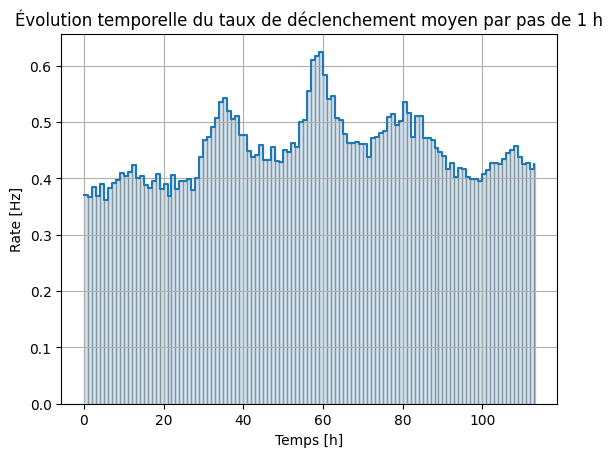

There is 114 sub_df in total.


In [406]:
plt.bar(t/3600, y, width=durations/(10**9*3600), align="edge", alpha=0.2, edgecolor="black")
plt.step(t/3600, y, where="post")#,marker=".",color="red")
plt.xlabel("Temps [h]")
plt.ylabel("Rate [Hz]")
plt.title(f"Évolution temporelle du taux de déclenchement moyen par pas de {t_hour} h")
plt.grid()
plt.show()

print(f"There is {nb_sub_df} sub_df in total.")


# Test de la fonction implémentée sur VS code :

First group event at : 816307680.0 ns = 0.8163076800000001 s = 0.013605128000000001 min 
Last  group event at : 407340253427970.0 ns = 407340.25342797005 s = 6789.004223799501 min = 113.15007039665835 h
There is 114 sub_df in total
Name       |       Start [s] |        Stop [s] |  Events | Duration [s] |  Rate [Hz] |      Error |
----------------------------------------------------------------------------------------------------
Entire df  |          0.8163 |     407340.2534 |  183233 |  407339.4371 |     0.4498 |     0.0011 |
----------------------------------------------------------------------------------------------------


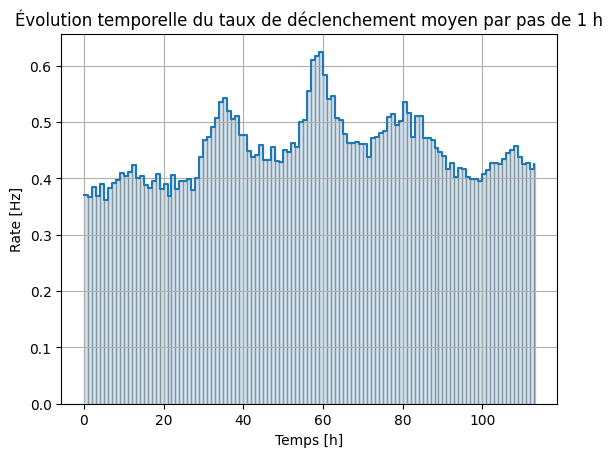

In [407]:
sub_df_fct, durations_fct, t_fct, rate_fct = fct.split_in_sub_df(df_clean, delta_t=1, show_sub_df=False,
                                                                 show_abstract=False, plot_rate_var=True)

Comparaison des résultats avec ceux du jupyter_note_book

In [409]:
ok = True
for i in sub_df.keys():
    if not sub_df[i].equals(sub_df_fct[i]):
        print(f"sub_df[{i}] différent")
        ok = False
if ok:
    print("Tous les sub_df sont identiques !")

if type(sub_df) == type(sub_df_fct):
    print("Les deux objets sont du même type :", type(sub_df))
else:
    print("Types différents :", type(sub_df), "vs", type(sub_df_fct))
    
ok2 = True

if not t.all() == t_fct.all() :
    print(f"t ≠ t_fct")
    ok2 = False
    
if not rate.all() == rate_fct.all() :
    print(f"rate ≠ rate_fct")
    ok2 = False
    
if ok2:
    print("t = t_fct et rate = rate_fct !")

Tous les sub_df sont identiques !
Les deux objets sont du même type : <class 'dict'>
t = t_fct et rate = rate_fct !
